In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
import math
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

stations_Q1Q2 = pd.read_csv("/Users/Joey/Downloads/Divvy_Trips_2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv")
stations_Q3Q4 = pd.read_csv("/Users/Joey/Downloads/Divvy_Trips_2017_Q3Q4/Divvy_Stations_2017_Q3Q4.csv")
trips_Q1 = pd.read_csv("Divvy_Trips_2017_Q1.csv")
trips_Q2 = pd.read_csv("Divvy_Trips_2017_Q2.csv")
trips_Q3 = pd.read_csv("Divvy_Trips_2017_Q3.csv")
trips_Q4 = pd.read_csv("Divvy_trips_2017_Q4.csv")

In [2]:
# NANS are dropped in order to be able to perform more in depth analysis based on gender and age
trips_NAN = trips_Q1.append(trips_Q2).append(trips_Q3).append(trips_Q4)
trips = trips_NAN.dropna()
trips.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


In [3]:
chicago_stations = stations_Q3Q4[stations_Q3Q4["city"] == "Chicago"]
chicago_stations

,id,name,city,latitude,longitude,dpcapacity,online_date
0,2.0,Buckingham Fountain,Chicago,41.876393,-87.620328,27.0,6/10/13 10:43
1,3.0,Shedd Aquarium,Chicago,41.867226,-87.615355,55.0,6/10/13 10:44
2,4.0,Burnham Harbor,Chicago,41.856268,-87.613348,23.0,6/10/13 10:46
3,5.0,State St & Harrison St,Chicago,41.874053,-87.627716,23.0,6/10/13 10:46
4,6.0,Dusable Harbor,Chicago,41.885041,-87.612794,39.0,6/10/13 11:18
5,7.0,Field Blvd & South Water St,Chicago,41.886349,-87.617517,19.0,6/19/13 10:00
6,9.0,Leavitt St & Archer Ave,Chicago,41.828792,-87.680604,19.0,6/21/13 9:33
7,11.0,Jeffery Blvd & 71st St,Chicago,41.766638,-87.576450,11.0,6/21/13 9:39
8,12.0,South Shore Dr & 71st St,Chicago,41.766409,-87.565688,15.0,6/21/13 10:00
9,13.0,Wilton Ave & Diversey Pkwy,Chicago,41.932418,-87.652705,27.0,6/22/13 18:29


In [4]:
chicago_stations.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
0,2.0,Buckingham Fountain,Chicago,41.876393,-87.620328,27.0,6/10/13 10:43
1,3.0,Shedd Aquarium,Chicago,41.867226,-87.615355,55.0,6/10/13 10:44
2,4.0,Burnham Harbor,Chicago,41.856268,-87.613348,23.0,6/10/13 10:46
3,5.0,State St & Harrison St,Chicago,41.874053,-87.627716,23.0,6/10/13 10:46
4,6.0,Dusable Harbor,Chicago,41.885041,-87.612794,39.0,6/10/13 11:18


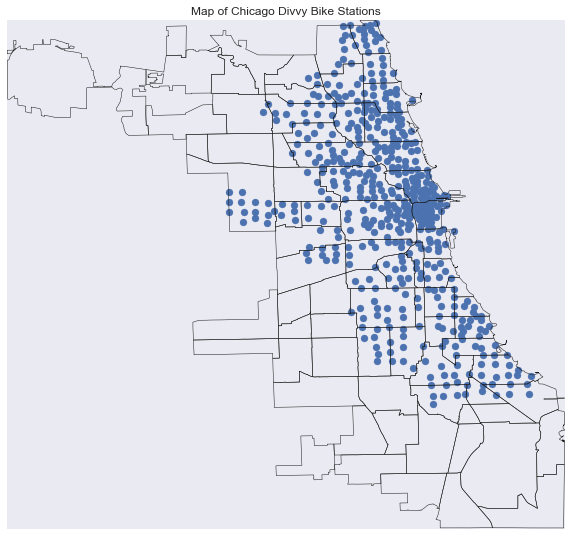

In [5]:
fig, ax = plt.subplots(figsize=(10,20))
m = Basemap(resolution='c', projection='cyl', 
            lat_0 = 41.833659, lon_0 = 41.833659, 
            llcrnrlon = -87.940102, llcrnrlat = 41.643921, 
            urcrnrlon = -87.523987, urcrnrlat = 42.023022)

plt.scatter(chicago_stations["longitude"], chicago_stations["latitude"], marker = 'o', alpha=1, color='b')

m.readshapefile("/Users/Joey/Downloads/Boundaries - Community Areas (current)/geo_export_db9254f6-66ca-4d05-a38a-5b6f7d256784", "areas")

plt.title("Map of Chicago Divvy Bike Stations")
plt.show()

In [6]:
# splitting users into different age groups

#child 0-12
child_trips = trips[trips["birthyear"] > 2004] # will be younger than 13 (not including)

#young age 13-30
young_trips = trips[trips["birthyear"] > 1986] # younger than 31
young_trips = young_trips[young_trips["birthyear"] < 2005] # older than 12

#middle age 31-50
middle_trips = trips[trips["birthyear"] > 1966] # younger than 51 
middle_trips = middle_trips[middle_trips["birthyear"] < 1987] # older than 30

#senior age 51-up
senior_trips = trips[trips["birthyear"] < 1967] # older than 50

In [7]:
# further splitting the age groups into gender

maleChild = child_trips[child_trips["gender"] == "Male"]
femaleChild = child_trips[child_trips["gender"] == "Female"]

maleYoung = young_trips[young_trips["gender"] == "Male"]
femaleYoung = young_trips[young_trips["gender"] == "Female"]

maleMiddle = middle_trips[middle_trips["gender"] == "Male"]
femaleMiddle = middle_trips[middle_trips["gender"] == "Female"]

maleSenior = senior_trips[senior_trips["gender"] == "Male"]
femaleSenior = senior_trips[senior_trips["gender"] == "Female"]

print ("total trips: ", trips.size)
print ("child_count (0-12): ", child_trips.size)
print ("\tmale: ", maleChild.size)
print ("\tfemale: ", femaleChild.size)
print ("young_count (13-30): ", young_trips.size)
print ("\tmale: ", maleYoung.size)
print ("\tfemale: ", femaleYoung.size)
print ("middle_count (31-50): ", middle_trips.size)
print ("\tmale: ", maleMiddle.size)
print ("\tfemale: ", femaleMiddle.size)
print ("senior_count (51-up): ", senior_trips.size)
print ("\tmale: ", maleSenior.size)
print ("\tfemale: ", femaleSenior.size)

total trips:  35903280
child_count (0-12):  636
	male:  636
	female:  0
young_count (13-30):  15182076
	male:  10804080
	female:  4377996
middle_count (31-50):  16282860
	male:  12647496
	female:  3635364
senior_count (51-up):  4437708
	male:  3491448
	female:  946260


Text(0,0.5,'Trip Duration')

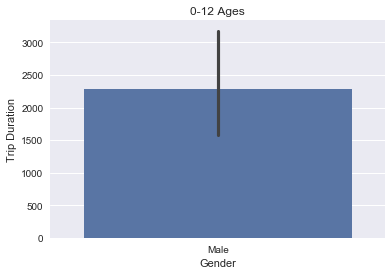

In [8]:
sns.barplot(x="gender", y="tripduration", data = child_trips)
plt.title("0-12 Ages")
plt.xlabel("Gender")
plt.ylabel("Trip Duration")

Text(0,0.5,'Trip Duration')

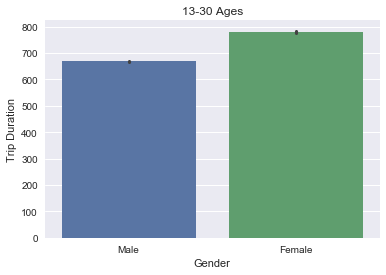

In [9]:
sns.barplot(x="gender", y="tripduration", data = young_trips)
plt.title("13-30 Ages")
plt.xlabel("Gender")
plt.ylabel("Trip Duration")

Text(0,0.5,'Trip Duration')

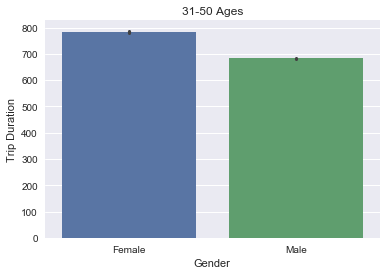

In [11]:
sns.barplot(x="gender", y="tripduration", data = middle_trips)
plt.title("31-50 Ages")
plt.xlabel("Gender")
plt.ylabel("Trip Duration")

Text(0,0.5,'Trip Duration')

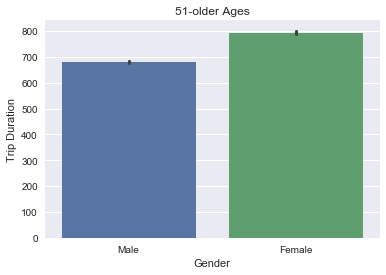

In [12]:
sns.barplot(x="gender", y="tripduration", data = senior_trips)
plt.title("51-older Ages")
plt.xlabel("Gender")
plt.ylabel("Trip Duration")

In [36]:
print ("Child Age Group")
print ("\tMale trip duration mean: ", round((maleChild["tripduration"].mean()/60), 2), "minutes")
print ("\tFemale trip duration mean: ", round((femaleChild["tripduration"].mean()/60), 2), "minutes")

print ("Young Age Group")
print ("\tMale trip duration mean: ", round((maleYoung["tripduration"].mean()/60), 2), "minutes")
print ("\tFemale trip duration mean: ", round((femaleYoung["tripduration"].mean()/60), 2), "minutes")

print ("Middle Age Group")
print ("\tMale trip duration mean: ", round((maleMiddle["tripduration"].mean()/60), 2), "minutes")
print ("\tFemale trip duration mean: ", round((femaleMiddle["tripduration"].mean()/60), 2), "minutes")

print ("Senior Age Group")
print ("\tMale trip duration mean: ", round((maleSenior["tripduration"].mean()/60), 2), "minutes")
print ("\tFemale trip duration mean: ", round((femaleSenior["tripduration"].mean()/60), 2), "minutes")

Child Age Group
	Male trip duration mean:  38.03 minutes
	Female trip duration mean:  nan minutes
Young Age Group
	Male trip duration mean:  11.15 minutes
	Female trip duration mean:  13.01 minutes
Middle Age Group
	Male trip duration mean:  11.38 minutes
	Female trip duration mean:  13.07 minutes
Senior Age Group
	Male trip duration mean:  11.34 minutes
	Female trip duration mean:  13.23 minutes


In [13]:


#
# NEXT SECTION IS FINDING THE MOST POPULAR STATION OF 4 AGE GROUPS (CHILD, YOUNG, MIDDLE, SENIOR)
#



In [20]:
# stations where the most bikes are checked out from/returned to for child group
popcheckout = child_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = child_trips["from_station_id"].value_counts()
popular_checkout_child = chicago_stations[chicago_stations["id"] == popcheckout]

popreturn = child_trips["to_station_id"].value_counts().idxmax()
popreturncount = child_trips["to_station_id"].value_counts()
popular_return_child = chicago_stations[chicago_stations["id"] == popreturn]
print( "Child Group")
print( "\tMost checked out from")
print( "\tID: ", popular_checkout_child.iloc[0].id, "\tCount: ", popcheckoutcount.max())
print( "\tMost returned to")
print( "\tID: ", popular_return_child.iloc[0].id, "\tCount:", popreturncount.max())


# stations where the most bikes are checked out from/returned to for young group
popcheckout = young_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = young_trips["from_station_id"].value_counts()
popular_checkout_young = chicago_stations[chicago_stations["id"] == popcheckout]

popreturn = young_trips["to_station_id"].value_counts().idxmax()
popreturncount = young_trips["to_station_id"].value_counts()
popular_return_young = chicago_stations[chicago_stations["id"] == popreturn]
print( "Young Group")
print( "\tMost checked out from")
print( "\tID: ", popular_checkout_young.iloc[0].id, "\tCount: ", popcheckoutcount.max())
print( "\tMost returned to")
print( "\tID: ", popular_return_young.iloc[0].id, "\tCount:", popreturncount.max())


# stations where the most bikes are checked out from/returned to for middle group
popcheckout = middle_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = middle_trips["from_station_id"].value_counts()
popular_checkout_middle = chicago_stations[chicago_stations["id"] == popcheckout]

popreturn = middle_trips["to_station_id"].value_counts().idxmax()
popreturncount = middle_trips["to_station_id"].value_counts()
popular_return_middle = chicago_stations[chicago_stations["id"] == popreturn]
print( "Middle Group")
print( "\tMost checked out from")
print( "\tID: ", popular_checkout_middle.iloc[0].id, "\tCount: ", popcheckoutcount.max())
print( "\tMost returned to")
print( "\tID: ", popular_return_middle.iloc[0].id, "\tCount:", popreturncount.max())


# stations where the most bikes are checked out from/returned to for the senior group
popcheckout = senior_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = senior_trips["from_station_id"].value_counts()
popular_checkout_senior = chicago_stations[chicago_stations["id"] == popcheckout]

popreturn = senior_trips["to_station_id"].value_counts().idxmax()
popreturncount = senior_trips["to_station_id"].value_counts()
popular_return_senior = chicago_stations[chicago_stations["id"] == popreturn]
print( "Senior Group")
print( "\tMost checked out from")
print( "\tID: ", popular_checkout_senior.iloc[0].id, "\tCount: ", popcheckoutcount.max())
print( "\tMost returned to")
print( "\tID: ", popular_return_senior.iloc[0].id, "\tCount:", popreturncount.max())


# most popular check out/return to station
popcheckout = trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = trips["from_station_id"].value_counts()
popular_checkout_overall = chicago_stations[chicago_stations["id"] == popcheckout]

popreturn = trips["to_station_id"].value_counts().idxmax()
popreturncount = trips["to_station_id"].value_counts()
popular_return_overall = chicago_stations[chicago_stations["id"] == popreturn]
print( "Most popular overall")
print( "\tMost checked out from")
print( "\tID: ", popular_checkout_overall.iloc[0].id, "\tCount: ", popcheckoutcount.max())
print( "\tMost returned to")
print( "\tID: ", popular_return_overall.iloc[0].id, "\tCount:", popreturncount.max())

Child Group
	Most checked out from
	ID:  436.0 	Count:  27
	Most returned to
	ID:  436.0 	Count: 29
Young Group
	Most checked out from
	ID:  77.0 	Count:  13524
	Most returned to
	ID:  77.0 	Count: 14831
Middle Group
	Most checked out from
	ID:  192.0 	Count:  28359
	Most returned to
	ID:  192.0 	Count: 31403
Senior Group
	Most checked out from
	ID:  91.0 	Count:  11877
	Most returned to
	ID:  91.0 	Count: 11304
Most popular overall
	Most checked out from
	ID:  192.0 	Count:  48924
	Most returned to
	ID:  192.0 	Count: 50824


In [21]:
# child group most popular checkout and return stations
popcheckout = child_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = child_trips["from_station_id"].value_counts()
popular_checkout_child = chicago_stations[chicago_stations["id"] == popcheckout]
popreturn = child_trips["to_station_id"].value_counts().idxmax()
popreturncount = child_trips["to_station_id"].value_counts()
popular_return_child = chicago_stations[chicago_stations["id"] == popreturn]

# young group most popular checkout and return stations
popcheckout = young_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = young_trips["from_station_id"].value_counts()
popular_checkout_young = chicago_stations[chicago_stations["id"] == popcheckout]
popreturn = young_trips["to_station_id"].value_counts().idxmax()
popreturncount = young_trips["to_station_id"].value_counts()
popular_return_young = chicago_stations[chicago_stations["id"] == popreturn]

# middle/senior/overall group most popular checkout and return stations
popcheckout = middle_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = middle_trips["from_station_id"].value_counts()
popular_checkout_middle = chicago_stations[chicago_stations["id"] == popcheckout]
popreturn = middle_trips["to_station_id"].value_counts().idxmax()
popreturncount = middle_trips["to_station_id"].value_counts()
popular_return_middle = chicago_stations[chicago_stations["id"] == popreturn]

# senior/overall group most popular checkout and return stations
popcheckout = senior_trips["from_station_id"].value_counts().idxmax()
popcheckoutcount = senior_trips["from_station_id"].value_counts()
popular_checkout_all = chicago_stations[chicago_stations["id"] == popcheckout]
popreturn = senior_trips["to_station_id"].value_counts().idxmax()
popreturncount = senior_trips["to_station_id"].value_counts()
popular_return_all = chicago_stations[chicago_stations["id"] == popreturn]

popular_return_child
# child group tend to checkout and return to a bike station
# middle group tend to checkout and return to a bike station right outside Union Station in Chicago
# young and senior tend to checkout and return to Ogilvie Train Station in Chicago with that being the most popular

,id,name,city,latitude,longitude,dpcapacity,online_date
400,436.0,Fairfield Ave & Roosevelt Rd,Chicago,41.866624,-87.694521,15.0,2/10/15 11:48
